In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [ ]:
df.isna().sum()
df = df.dropna()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ct = MinMaxScaler()
df2 = ct.fit_transform(df)

df2 = pd.DataFrame(df2, columns=df.columns)
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0
...,...,...,...,...,...,...,...
391,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0
392,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0
393,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0
394,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0


In [ ]:
train = df2.sample(frac=0.8, random_state=0) 
test = df2.drop(train.index)

train_feature, train_label = train.drop(columns=['mpg']), train['mpg']
test_feature, test_label = test.drop(columns=['mpg']), test['mpg']

Text(0, 0.5, 'mpg')

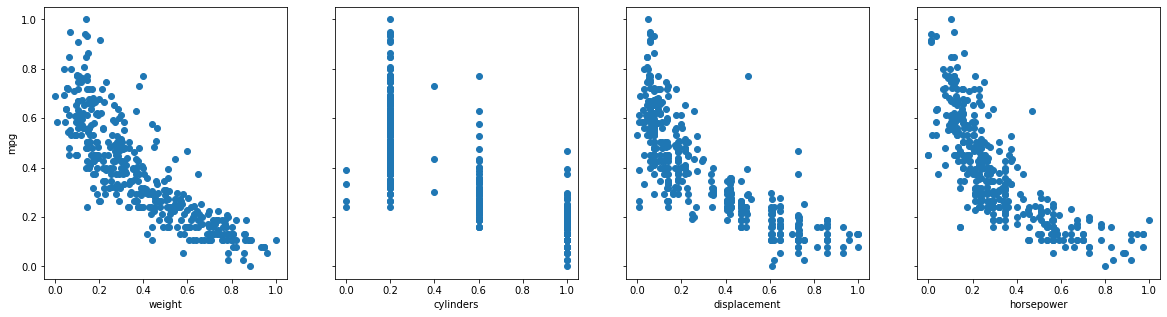

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey=True)

ax1.scatter(df2['weight'], df2['mpg'])
ax2.scatter(df2['cylinders'], df2['mpg'])
ax3.scatter(df2['displacement'], df2['mpg'])
ax4.scatter(df2['horsepower'], df2['mpg'])

ax1.set_xlabel('weight')
ax2.set_xlabel('cylinders')
ax3.set_xlabel('displacement')
ax4.set_xlabel('horsepower')
ax1.set_ylabel('mpg')

In [ ]:
class NetworkDense(tf.keras.Model):
  def __init__(self):
    super(NetworkDense, self).__init__()
    self.fc1 = tf.keras.layers.Dense(62, activation='relu')
    self.fc2 = tf.keras.layers.Dense(62, activation='relu')
    self.fc3 = tf.keras.layers.Dense(1)
  
  def call(self, inputs, training=None, mask=None):
    x = self.fc1(inputs)
    x = self.fc2(x)
    x = self.fc3(x)

    return(x)



In [ ]:
model = NetworkDense()
model.build(input_shape=(1, 6))
model.compile(optimizer='adam',
              loss='mse',
              metrics='mae')
model.fit(train_feature, train_label, epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 3ms/step - loss: 0.0673 - mae: 0.2123
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 0.0236 - mae: 0.1284
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 0.0158 - mae: 0.1001
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 0.0141 - mae: 0.0919
Epoch 5/5
10/10 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0832


In [ ]:
train_feature.shape

(317, 6)